# Tutorial - Time Series Forecasting - Holt’s Linear Trend

The goal is to forecast time series with the Holt’s Linear Trend Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function Holt’s Linear Trend with Air Passengers, and 5) Function Holt’s Linear Trend with Wine Sales.

References Analytics Vidhya - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [17]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [18]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Holt’s Linear Trend Approach with JetRail 

This method consists of decomposing Time Series into it’s components (Trend, Seasonality and Residual). Holt simply leverage the exponential smoothing to account for a trend. It's important to note that there are 2 methods: multiplicative equation or  additive equation.

In [19]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

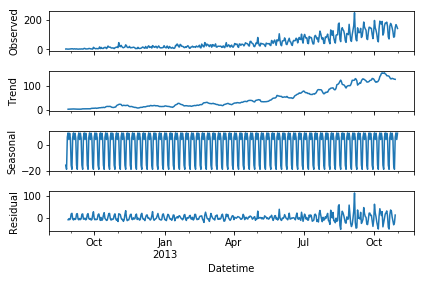

In [20]:
#Decomposing Time Series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [21]:
# Create prediction table
from statsmodels.tsa.holtwinters import Holt
y_hat = test.copy()
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat['Holt_linear'] = fit1.forecast(len(test))

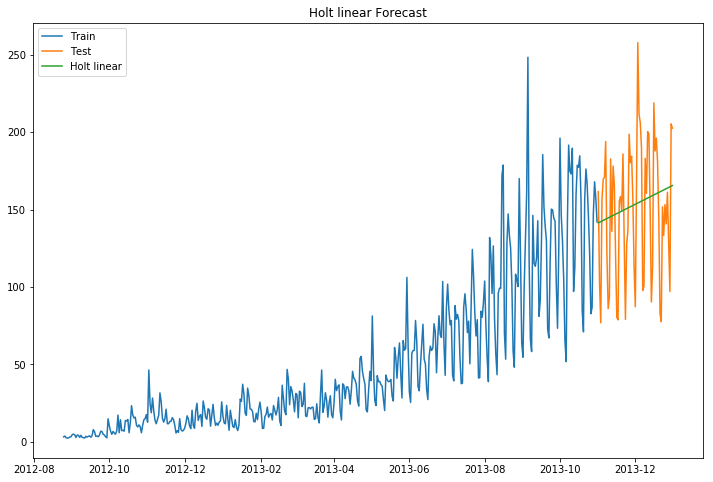

In [22]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.title("Holt linear Forecast")
plt.show()

# RMSE Calculation

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.Holt_linear))
print('RMSE = '+str(rms))

RMSE = 43.05625961150728


# Holt’s Linear Trend Approach Approach with Air Passagers

In [24]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [25]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

In [26]:
from statsmodels.tsa.api import Holt
# Create prediction table
y_hat = test.copy()
fit1 = Holt(np.asarray(train['Passengers'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat['Holt_linear'] = fit1.forecast(len(test))
y_hat.describe()

,Passengers,Holt_linear
count,44.000000,44.000000
mean,421.068182,369.800376
std,77.330279,19.332622
min,305.000000,337.441962
25%,359.750000,353.621169
50%,406.500000,369.800376
75%,465.500000,385.979584
max,622.000000,402.158791


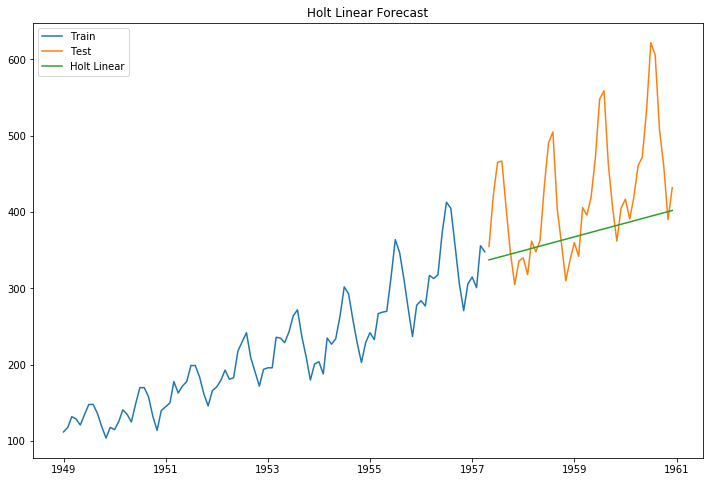

In [27]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['Holt_linear'], label='Holt Linear')
plt.legend(loc='best')
plt.title("Holt Linear Forecast")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.Holt_linear))
print('RMSE = '+str(rms))

RMSE = 86.15565162839955


# Function Holt’s Linear Trend Approach

In [29]:
def Holt_linear_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit1 = Holt(np.asarray(train[colval])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    y_hat['Holt_linear'] = fit1.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['Holt_linear'], label='Holt Linear')
    plt.legend(loc='best')
    plt.title("Holt Linear Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.Holt_linear))
    print('RMSE = '+str(rms))

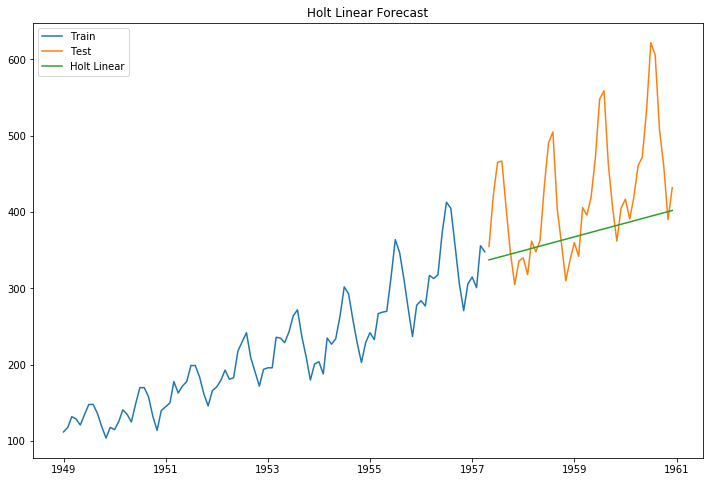

RMSE = 86.15565162839955


In [30]:
Holt_linear_forecasting(df,'Passengers',0.7)

# Testing Function Holt’s Linear Trend Approach with Wine Dataset

In [31]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


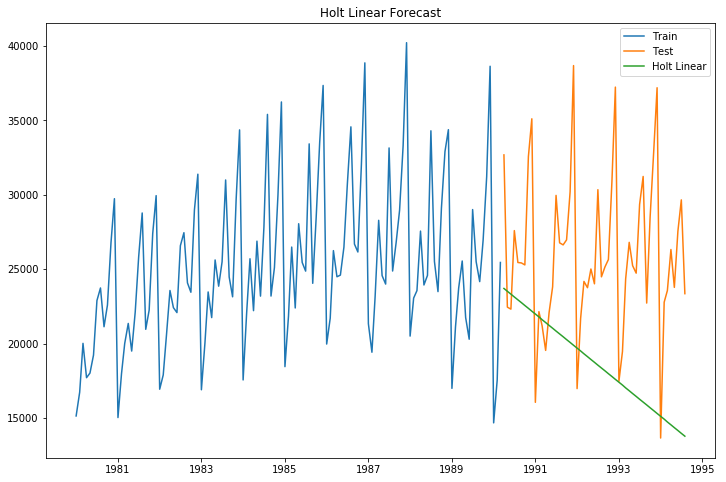

RMSE = 9364.906320540427


In [32]:
Holt_linear_forecasting(df,'Sales',0.7)